# Discussion Forum Prediction

# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import string
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


# LOADING THE DATASET

In [2]:
#reading data
data=pd.read_csv("../input/twitter-and-reddit-sentimental-analysis-dataset/Reddit_Data.csv",nrows=1000)



In [3]:
data

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
995,vote for government rather than candidate the ...,-1
996,going vote for modiji and hope you guys would...,0
997,tharoor case national importance with the ment...,-1
998,can someone the media investigate who raga hum...,-1


In [4]:
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [5]:
data.value_counts()

clean_comment                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             category
                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [6]:
data.describe()

,category
count,1000.000000
mean,0.289000
std,0.786192
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
data.columns

Index(['clean_comment', 'category'], dtype='object')

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
category,1000.0,0.289,0.786192,-1.0,0.0,0.0,1.0,1.0


In [9]:
data.isnull().sum()

clean_comment    2
category         0
dtype: int64

In [10]:
data.dropna(axis = 0, inplace = True)

In [11]:
#lets find the categorialfeatures
list_1=list(data.columns)


In [12]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [14]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])

In [15]:
data

,clean_comment,category
0,88,1
1,411,1
2,757,-1
3,907,0
4,502,1
...,...,...
995,870,-1
996,105,0
997,796,-1
998,421,-1


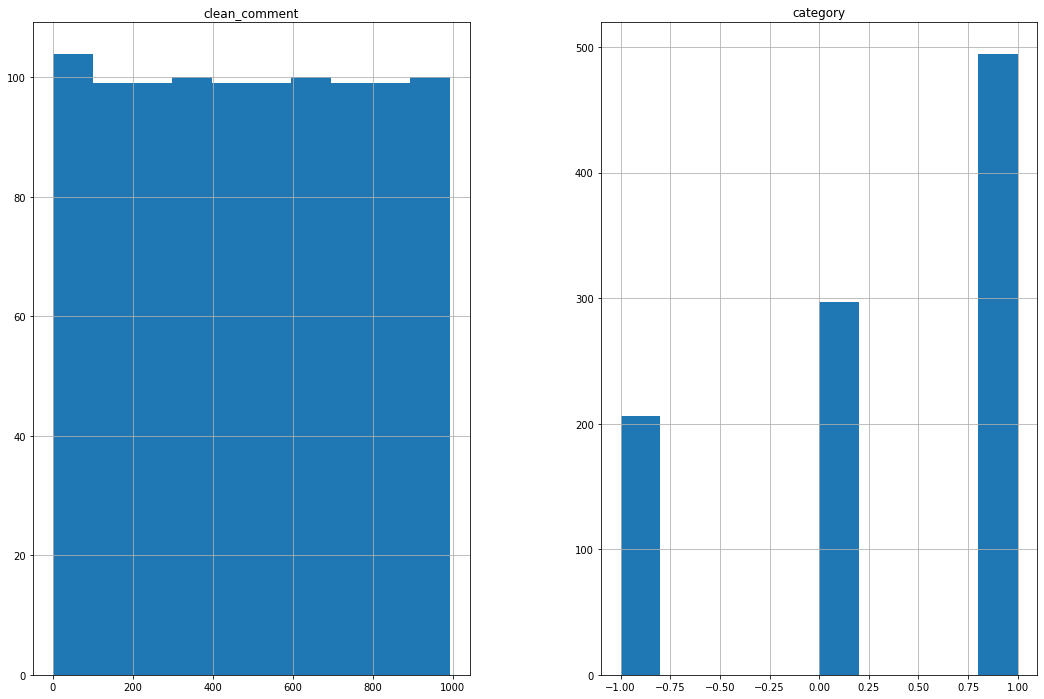

In [16]:
data.hist(figsize=(18,12))
plt.show()


In [17]:
data.corr()

,clean_comment,category
clean_comment,1.00000,-0.01732
category,-0.01732,1.00000


<AxesSubplot:>

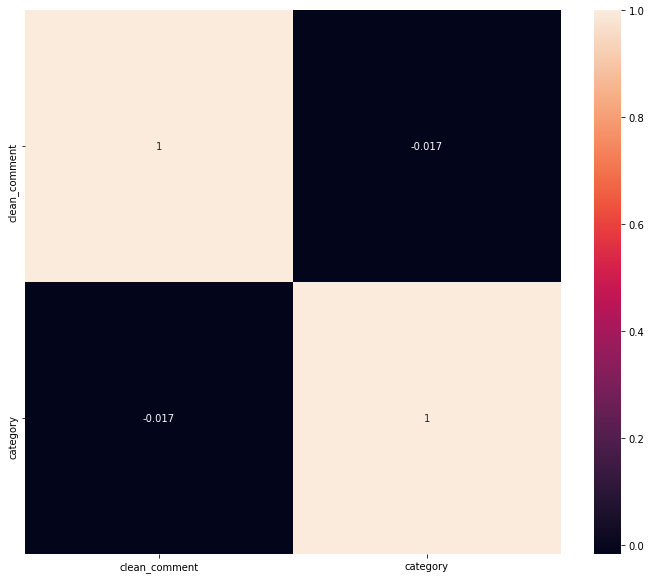

In [18]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)


In [19]:
data.shape

(998, 2)

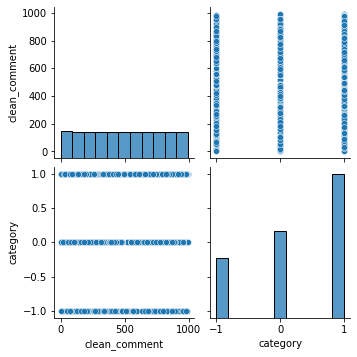

In [20]:
sns.pairplot(data=data)


# NLTK

In [21]:
import nltk
import scikitplot as skplt
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text


In [23]:
#lets find the categorialfeatures
list_1=list(data.columns)


In [24]:
list_cate=[]
for i in list_1:
    if data[i].dtype=='object':
        list_cate.append(i)


In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [26]:
for i in list_cate:
    data[i]=le.fit_transform(data[i])


In [27]:
data

,clean_comment,category
0,88,1
1,411,1
2,757,-1
3,907,0
4,502,1
...,...,...
995,870,-1
996,105,0
997,796,-1
998,421,-1


In [28]:
y=data['category']
x=data.drop('category',axis=1)



# TRAINING AND TESTING DATA

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)


# Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [31]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


798
200
798
200


# ANN

In [32]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(x_train,y_train,batch_size = 10,
    epochs=200,
)


Epoch 1/200
80/80 [==============================] - 1s 926us/step - loss: 0.6898 - accuracy: 0.3141
Epoch 2/200
80/80 [==============================] - 0s 934us/step - loss: 0.6662 - accuracy: 0.3045
Epoch 3/200
80/80 [==============================] - 0s 952us/step - loss: 0.6468 - accuracy: 0.3217
Epoch 4/200
80/80 [==============================] - 0s 986us/step - loss: 0.5991 - accuracy: 0.3073
Epoch 5/200
80/80 [==============================] - 0s 1ms/step - loss: 0.6016 - accuracy: 0.2892
Epoch 6/200
80/80 [==============================] - 0s 1ms/step - loss: 0.5740 - accuracy: 0.2750
Epoch 7/200
80/80 [==============================] - 0s 944us/step - loss: 0.5693 - accuracy: 0.2935
Epoch 8/200
80/80 [==============================] - 0s 972us/step - loss: 0.5573 - accuracy: 0.2797
Epoch 9/200
80/80 [==============================] - 0s 923us/step - loss: 0.5579 - accuracy: 0.2928
Epoch 10/200
80/80 [==============================] - 0s 957us/step - loss: 0.5426 - accuracy: 

In [33]:
classifier.evaluate(x_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.6497 - accuracy: 0.3150


[0.649708092212677, 0.3149999976158142]

**MODELS**

**1. KNeighborsClassifier**



In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [35]:

y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

          -1       0.22      0.26      0.24        34
           0       0.48      0.33      0.39        63
           1       0.54      0.60      0.57       103

    accuracy                           0.46       200
   macro avg       0.41      0.40      0.40       200
weighted avg       0.47      0.46      0.46       200

Confusion Matrix:
 [[ 9  4 21]
 [10 21 32]
 [22 19 62]]
Training Score:
 59.64912280701754


In [36]:
knn.score(x_test,y_test)*100

46.0

**2. Naive Bayes**



In [37]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [38]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00        34
           0       0.00      0.00      0.00        63
           1       0.52      1.00      0.68       103

    accuracy                           0.52       200
   macro avg       0.17      0.33      0.23       200
weighted avg       0.27      0.52      0.35       200

Confusion Matrix:
 [[  0   0  34]
 [  0   0  63]
 [  0   0 103]]
Training Score:
 49.122807017543856


In [39]:
gnb.score(x_test,y_test)*100

51.5

**3. DECISION TREE CLASSIFIER**



In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [41]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

          -1       0.12      0.03      0.05        34
           0       0.62      0.16      0.25        63
           1       0.54      0.92      0.68       103

    accuracy                           0.53       200
   macro avg       0.43      0.37      0.33       200
weighted avg       0.50      0.53      0.44       200

Confusion Matrix:
 [[ 1  2 31]
 [ 3 10 50]
 [ 4  4 95]]
Training Score:
 55.88972431077694


In [42]:
dtree.score(x_test,y_test)*100

53.0

**4.Random Forest Classifier**



In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

          -1       0.20      0.24      0.22        34
           0       0.44      0.40      0.42        63
           1       0.57      0.57      0.57       103

    accuracy                           0.46       200
   macro avg       0.40      0.40      0.40       200
weighted avg       0.47      0.46      0.46       200

Confusion Matrix:
 [[ 8 10 16]
 [10 25 28]
 [22 22 59]]
Training Score:
 100.0


**5. Logistic Regression**

In [45]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)                         

LogisticRegression()

In [46]:
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Training Score:\n",reg.score(x_train,y_train)*100)
print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")


Training Score:
 49.122807017543856
r2 Score of test set : -0.7580281814567777


In [47]:
reg.score(x_test,y_test)*100

51.5

In [48]:
from sklearn.linear_model import LassoLars,LinearRegression,LogisticRegression,Ridge,Lasso


In [49]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)


LinearRegression()

In [50]:
y_pred = lin_reg.predict(x_test)
 
print(f"r2 Score of test set : {r2_score(y_test, y_pred)}")


r2 Score of test set : -0.007605072661144074


In [51]:
lin_reg.intercept_


0.2756892230576441

In [52]:
lin_reg.coef_


array([-0.00580684])

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,y_pred)


0.5702792809993911

**6. AdaBoostClassifier**

In [54]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)


AdaBoostClassifier()

In [55]:
y_pred=adb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",adb.score(x_train,y_train)*100)


Classification Report is:
               precision    recall  f1-score   support

          -1       0.50      0.06      0.11        34
           0       0.56      0.14      0.23        63
           1       0.54      0.95      0.69       103

    accuracy                           0.55       200
   macro avg       0.54      0.38      0.34       200
weighted avg       0.54      0.55      0.45       200

Confusion Matrix:
 [[ 2  2 30]
 [ 2  9 52]
 [ 0  5 98]]
Training Score:
 53.258145363408524


In [56]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data


,Actual,Predicted
270,-1,1
727,-1,1
31,-1,1
342,1,1
606,1,1
...,...,...
937,0,1
624,1,1
255,-1,1
272,0,1


**CONCLUSION :**

**ACCURACIES OF DIFFERENT MODELS ARE:**

**KNeighbors Classifier= 60.02 %**

**Naiye Bayes= 49.12 %**

**Decision Tree Classifier= 56.8 %**

**Random Forest Classifier= 99.87 %**

**Logistic Regression : 62.27 %**

**Ada Boost Classifier= 53.25 %**

**We got a good accuracy of about 99.87 % using Random Forest Classifier which is quite well for the given dataset.**

**The accuracy of other models can be increased further by HyperTuning.**



